####Importation des librairies

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

##chargement de donnée

In [2]:
# joindre les noms de colonne à l'ensemble de données
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# KDDTrain+_2.csv & KDDTest+_2.csv sont les fichiers de données sans la dernière colonne sur le score de difficulté
# ceux-ci ont déjà été supprimés.
df = pd.read_csv("KDDTrain+_2.csv", header=None, names = col_names)
df_test = pd.read_csv("KDDTest+_2.csv", header=None, names = col_names)

# shape, cela donne les dimensions de l'ensemble de données
print('Dimensions des données entrainement:',df.shape)
print('Dimensions des données test:',df_test.shape)

Dimensions des données entrainement: (125973, 42)
Dimensions des données test: (22544, 42)


In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.shape

(125973, 42)

In [5]:
train_data=df
test_data=df_test

###Vérification du type de données et rapports statistiques

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# number of attack labels
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

##L'analyse des données

###Analyse Univariée

In [14]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")


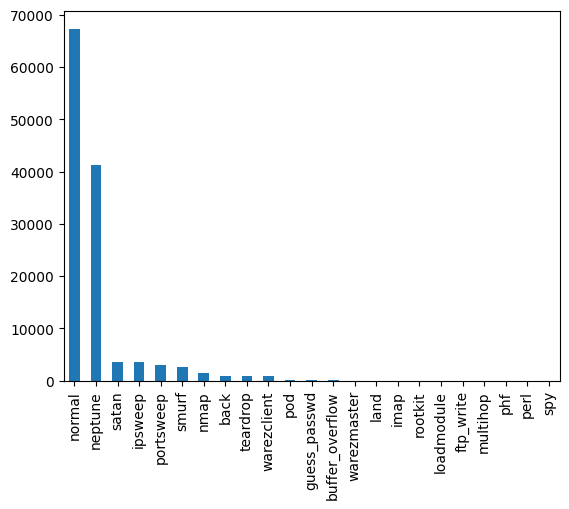

In [ ]:
bar_graph('label')

###Dans l'ensemble de données, il existe 4 classes d'attaques différentes :
###Denial of Service (DoS)
###Probe
###User to Root(U2R)
###Remote to Local (R2L)

In [15]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [16]:
change_label(train_data)

In [17]:
# distribution of attack classes
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

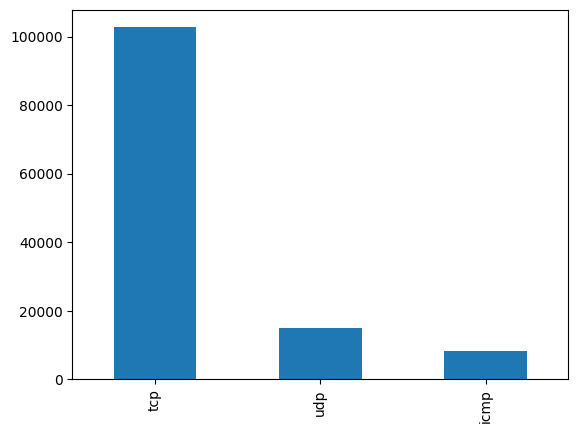

In [18]:
bar_graph('protocol_type')

In [19]:
train_data.service.value_counts(30)

http         0.320211
private      0.173474
domain_u     0.071785
smtp         0.058052
ftp_data     0.054456
               ...   
tftp_u       0.000024
http_8001    0.000016
aol          0.000016
harvest      0.000016
http_2784    0.000008
Name: service, Length: 70, dtype: float64

In [20]:
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index)
services_frequency

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

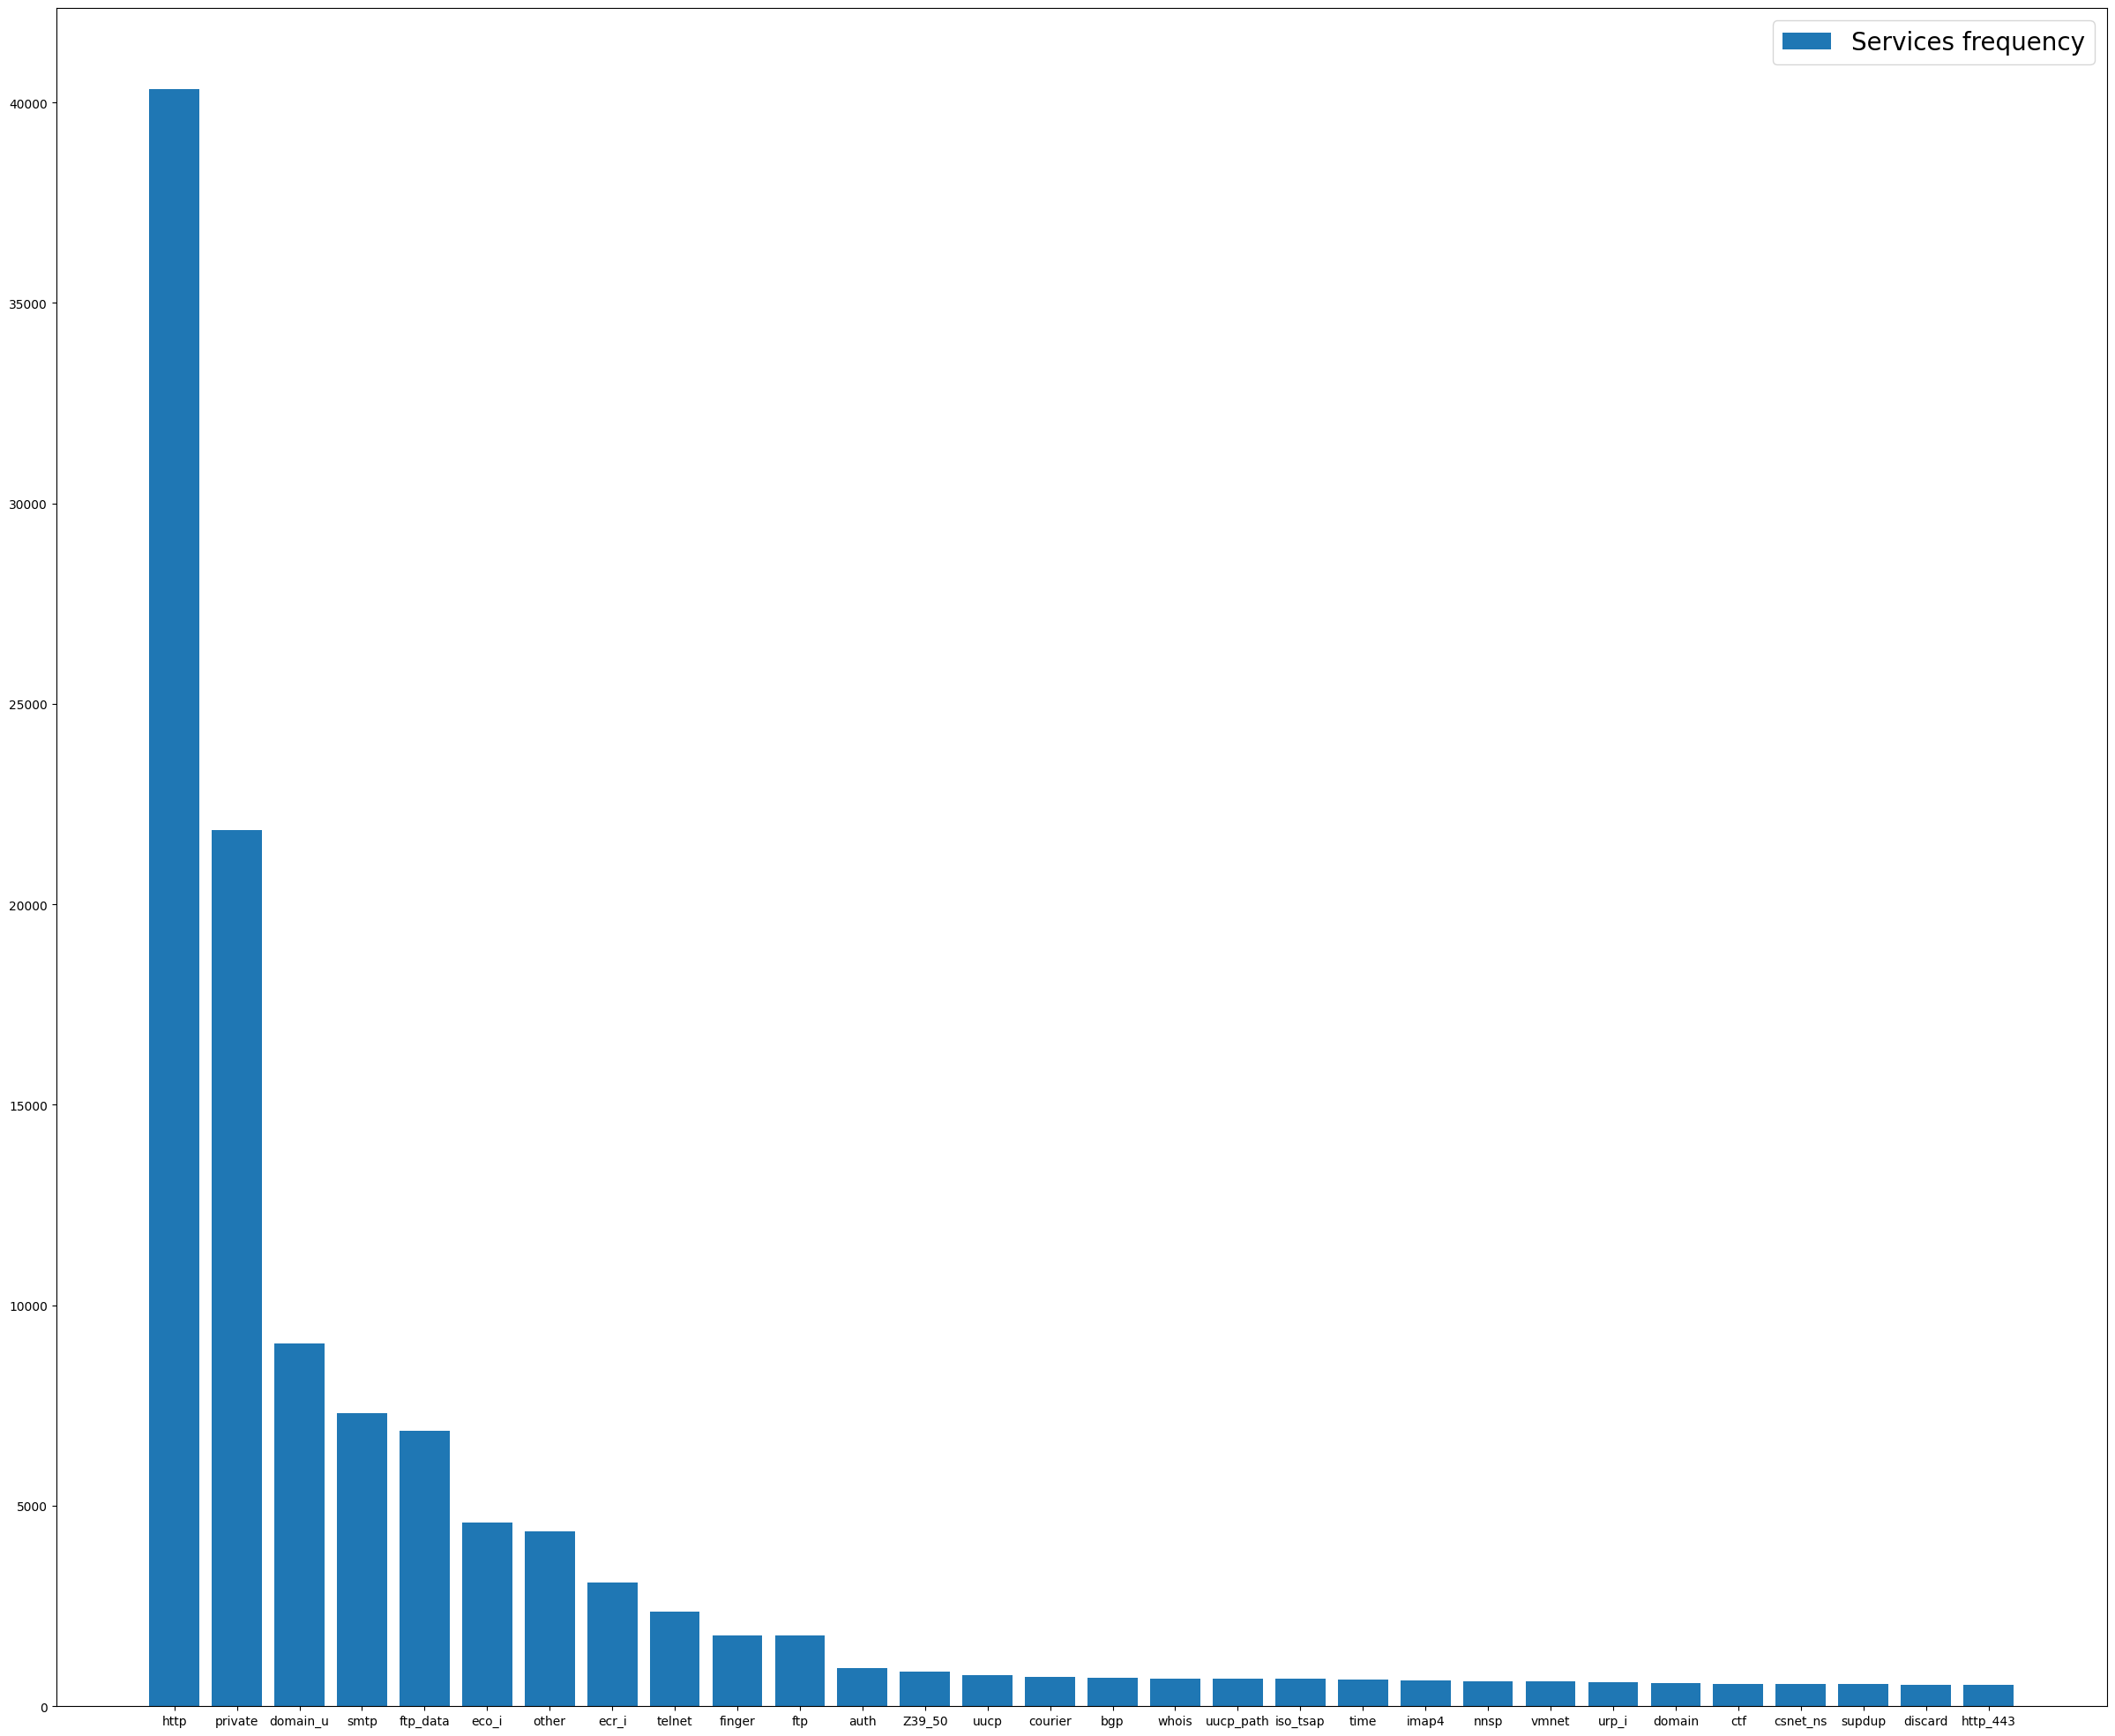

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,25)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

<ipython-input-22-1e2cde2fd433>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = df[feature])


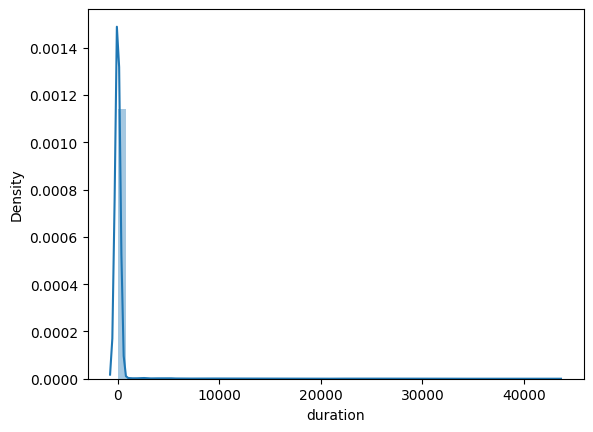

In [22]:
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

####Dans ce cas, la colonne 'duration' est divisée en cinq intervalles avec des bornes spécifiques définies dans la liste 'bins' : (-0.1, 0), (0, 10000), (10000, 20000), (20000, 30000) et (30000, 40000). Les intervalles sont inclusifs de leur borne inférieure et exclusifs de leur borne supérieure.

####Chaque valeur de la colonne 'duration' est ensuite assignée à l'un des intervalles spécifiés, et cette valeur d'intervalle est stockée dans la nouvelle colonne 'binned'. La méthode head() est ensuite appelée pour afficher les cinq premières lignes du DataFrame 'df' avec la colonne 'binned' nouvellement créée.

In [23]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head(30)

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"
5,0,"(-0.1, 0.0]"
6,0,"(-0.1, 0.0]"
7,0,"(-0.1, 0.0]"
8,0,"(-0.1, 0.0]"
9,0,"(-0.1, 0.0]"


####Chaque valeur de la colonne 'duration' est ensuite assignée à l'un des intervalles spécifiés, et la valeur correspondante d'étiquette est stockée dans la nouvelle colonne 'duration_bin'. Cela permet de donner des noms plus explicites aux différents intervalles.

In [24]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df.head(30)

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
5,0,"(-0.1, 0.0]",0
6,0,"(-0.1, 0.0]",0
7,0,"(-0.1, 0.0]",0
8,0,"(-0.1, 0.0]",0
9,0,"(-0.1, 0.0]",0


In [25]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

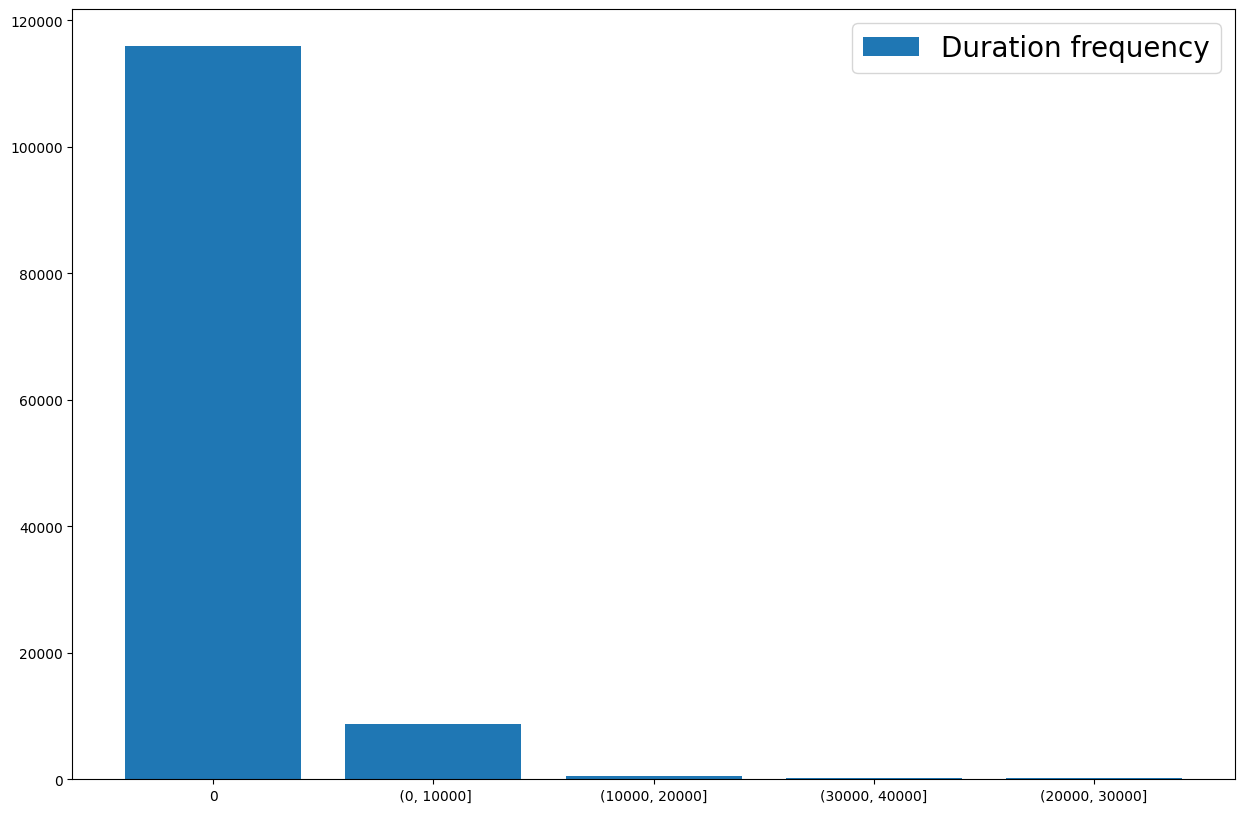

In [26]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

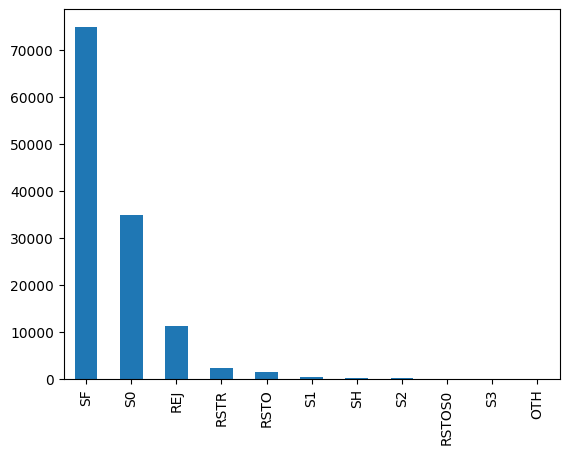

In [27]:
bar_graph('flag')


In [ ]:
###

###Analyse multivariée (Protocol Type, Services, Label)

In [28]:
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [29]:
df

,protocol,service,label,number of sample in Dataset


In [30]:
services = list(services_frequency.index)
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()

for ser in services:
  for pro in protocols:
    for lab in Label:
      i = len(train_data.loc[(train_data['service']== ser) & (train_data['protocol_type']== pro) & (train_data['label']==lab)])
      if (i != 0):
        df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)

<ipython-input-30-364162aa4c3e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
<ipython-input-30-364162aa4c3e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
<ipython-input-30-364162aa4c3e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
<ipython-input-30-364162aa4c3e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [31]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,service,label,number of sample in Dataset
0,tcp,http,normal,38049
5,tcp,private,Dos,15079
10,udp,domain_u,normal,9034
12,tcp,smtp,normal,7029
15,tcp,ftp_data,normal,4984
...,...,...,...,...
111,tcp,login,R2L,2
159,tcp,http_8001,Probe,2
160,tcp,aol,Probe,2
138,tcp,IRC,Probe,1


<h1>Preparation des données</h1>


## Pour  Binary et Multi-class Classification
##Label encoding with One-Hot

#Classification binaire
bin_data_train -> dataframe prêt pour la modélisation
numeric_bin_data -> uniquement des features numériques pour la sélection de features

In [32]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [33]:
# changer les étiquettes d'attaque en deux catégories 'normal' et 'anormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'anormal'))

In [34]:
# création d'un dataframe avec des étiquettes binaires (normal,anormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anormal


In [35]:
# étiquette encodage (0,1) étiquettes binaires(anormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anormal,0


In [36]:
#encodage unique(one-hot-encoding) de label attack
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


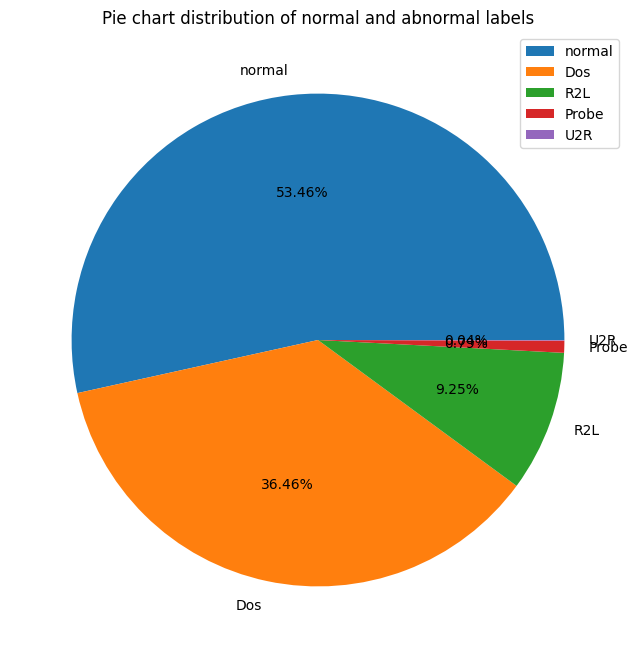

In [37]:
# diagramme à secteurs de distribution des étiquettes normales et anormales
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [39]:
#bin_data_train est un ensemble de données prêt pour la modélisation ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-1]
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
#cet ensemble de données comprend uniquement des caractéristiques numériques avec plusieurs étiquettes
#créé pour la sélection de fonctionnalités
# créer une trame de données avec uniquement des attributs numériques d'un ensemble de données de classe binaire et un attribut d'étiquette codé
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

<ipython-input-40-1be96759a25b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin_data['intrusion'] = bin_data['intrusion']


In [41]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


#Multi-class Classification
###multi_data_train -> ready dataframe for Modeling
###numeric_multi_data -> just numeric features for feature selection

In [42]:
#création d'un dataframe avec des étiquettes multi-classes(Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [43]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [44]:
# one-hot-encoding attack label

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos


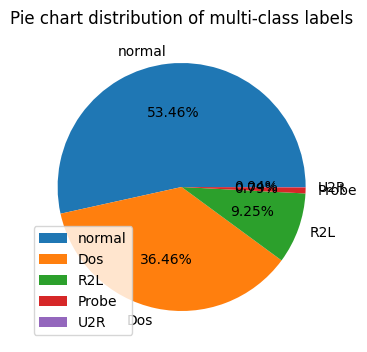

In [45]:
#diagrammeede distribution  multi-class labels
plt.figure(figsize=(4,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [46]:
# multi_data_train eest pret pour la modelisation  ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# cet ensemble de données ne comprend que des caractéristiques numériques avec plusieurs étiquettes
#created pour la sélection de fonctionnalités
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

<ipython-input-47-2219b29283f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi_data['label'] = multi_label


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0


###Sélection de feature
nous le faisons parce que nous préférons former des modèles avec des fonctionnalités significatives et obtenir un modèle fiable pour classer l'ensemble de test

In [48]:
#num_dataset_bin inclut simplement des fonctionnalités numériques avec des étiquettes binaires
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train a une dimension:',X_train_num_bin.shape,'\ny_train a une dimension:',y_train_num_bin.shape)

X_train a une dimension: (125973, 38) 
y_train a une dimension: (125973, 1)


In [49]:
#dataset_bin inclut des fonctionnalités de trou (avec des fonctionnalités non numériques codées telles que des services,  protocole et flag) avec des étiquettes binaires
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train a une dimension de:',X_train_bin.shape,'\ny_train a une dimension:',y_train_bin.shape)

X_train a une dimension de: (125973, 122) 
y_train a une dimension: (125973, 1)


In [50]:
#num_dataset_multi inclut simplement des fonctionnalités numériques avec des étiquettes multi-classes
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train dimeension:',X_train_num_multi.shape,'\ny_train dimention:',y_train_num_multi.shape)

X_train dimeension: (125973, 38) 
y_train dimention: (125973, 5)


In [51]:
#dataset_multi inclut des fonctionnalités de trou (avec des fonctionnalités non numériques codées telles que des services, un protocole et flag) avec des étiquettes multi-classes
dataset_multi = multi_data_train.copy()
y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print('X_train dimension:',X_train_multi.shape,'\ny_train dimension:',y_train_multi.shape)

X_train dimension: (125973, 122) 
y_train dimension: (125973, 5)


####Importance des features

#####Corrélation de Pearson pour un ensemble de données de classification binaire

#####Extraction de features à partir des données numériques_binaires

#####pearson_bin_dataset est un ensemble de données de classification binaire basé sur la corrélation de Pearson entre les caractéristiques numériques et la classe binaire (intrusion -> oui(1)/non(0)).

In [52]:
# trouver les attributs qui ont plus de 0,5 corrélation avec l'attribut d'attaque encodée label
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [53]:
highest_corr_columns= highest_corr.index

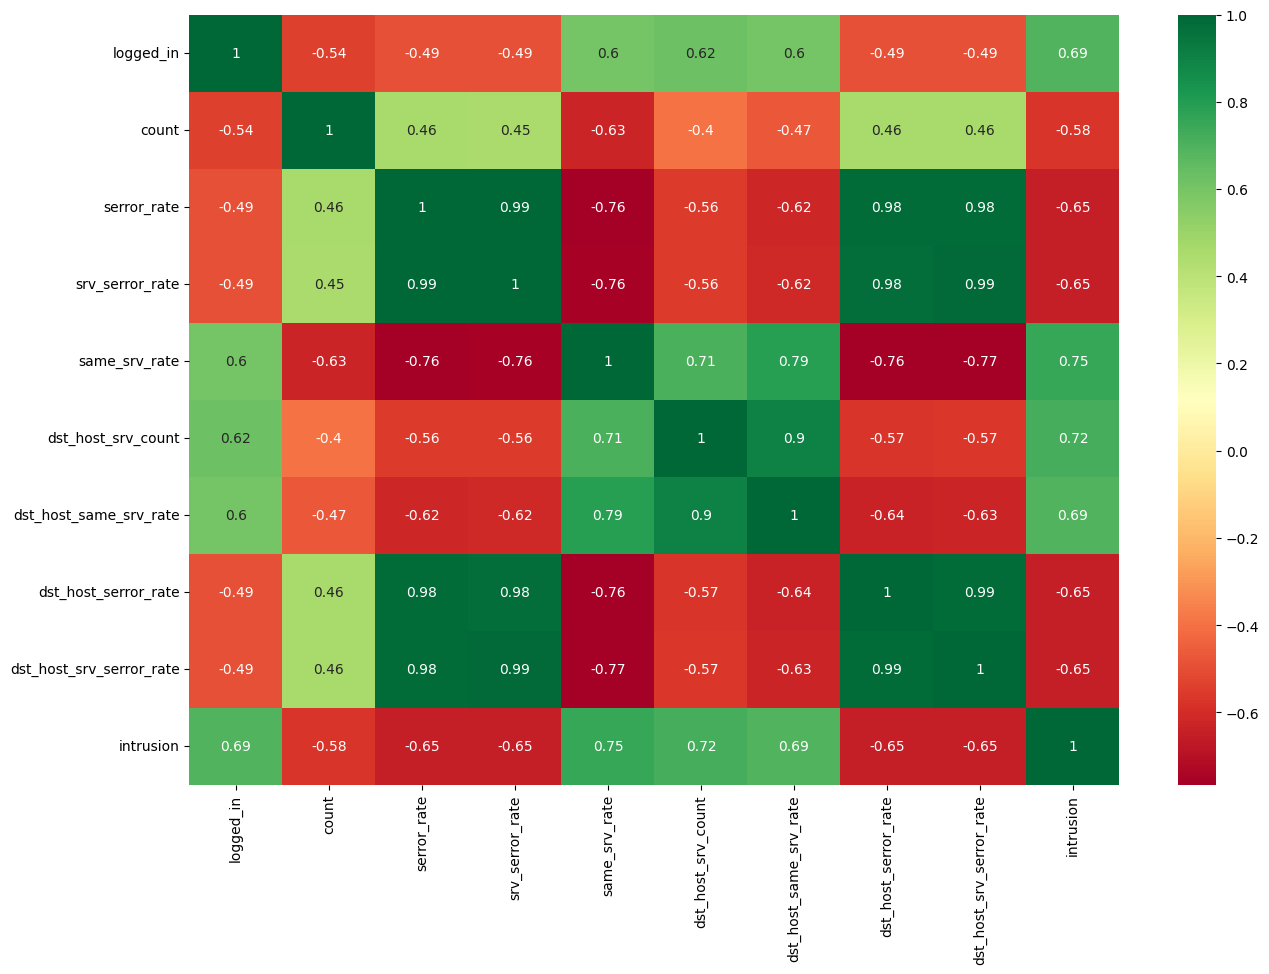

In [54]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [55]:

# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


####corrolation de Pearson pour un ensemble de données multi-classes
#####*sélection d'entités à partir de numeric_multi_data
#####*pearson_multi_dataset est un ensemble de données multi-classes basé sur la corrélation de Pearson entre les caractéristiques numériques et les multi-classes (types d'attaques)

In [56]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr = numeric_multi_data.corr()
corr_y = abs(corr[y_train_num_multi.columns])
highest_corr = corr_y[corr_y >0.5]
highest_corr

,Dos,Probe,R2L,U2R,normal
duration,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN
logged_in,0.580713,NaN,NaN,NaN,0.690171
num_compromised,NaN,NaN,NaN,NaN,NaN


In [57]:
Dos_features= highest_corr[highest_corr.Dos.notnull()].index
Probe_features= highest_corr[highest_corr.Probe.notnull()].index
R2L_features= highest_corr[highest_corr.R2L.notnull()].index
U2R_features= highest_corr[highest_corr.U2R.notnull()].index
normal_features= highest_corr[highest_corr.normal.notnull()].index

In [58]:
Dos_features.intersection(Probe_features)

Index([], dtype='object')

In [59]:
pearson_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in y_train_num_multi.columns:
  pearson_multi_features.remove(lab)
pearson_multi_features

['dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'count',
 'srv_serror_rate',
 'logged_in',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count']

In [60]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_multi_dataset = numeric_multi_data[pearson_multi_features]
pearson_multi_dataset

,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,serror_rate,dst_host_diff_srv_rate,same_srv_rate,count,srv_serror_rate,logged_in,dst_host_same_src_port_rate,dst_host_srv_count
0,0.17,0.00,0.00,0.0,0.03,1.00,2,0.0,0,0.17,25
1,0.00,0.00,0.00,0.0,0.60,0.08,13,0.0,0,0.88,1
2,0.10,1.00,1.00,1.0,0.05,0.05,123,1.0,0,0.00,26
3,1.00,0.03,0.01,0.2,0.00,1.00,5,0.2,1,0.03,255
4,1.00,0.00,0.00,0.0,0.00,1.00,30,0.0,1,0.00,255
...,...,...,...,...,...,...,...,...,...,...,...
125968,0.10,1.00,1.00,1.0,0.06,0.14,184,1.0,0,0.00,25
125969,0.96,0.00,0.00,0.0,0.01,1.00,2,0.0,0,0.01,244
125970,0.12,0.72,0.00,0.0,0.06,1.00,1,0.0,1,0.00,30
125971,0.03,1.00,1.00,1.0,0.05,0.06,144,1.0,0,0.00,8


In [61]:
pearson_multi_dataset = pearson_multi_dataset.join(y_train_num_multi)
pearson_multi_dataset

,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,serror_rate,dst_host_diff_srv_rate,same_srv_rate,count,srv_serror_rate,logged_in,dst_host_same_src_port_rate,dst_host_srv_count,Dos,Probe,R2L,U2R,normal
0,0.17,0.00,0.00,0.0,0.03,1.00,2,0.0,0,0.17,25,0,0,0,0,1
1,0.00,0.00,0.00,0.0,0.60,0.08,13,0.0,0,0.88,1,0,0,0,0,1
2,0.10,1.00,1.00,1.0,0.05,0.05,123,1.0,0,0.00,26,1,0,0,0,0
3,1.00,0.03,0.01,0.2,0.00,1.00,5,0.2,1,0.03,255,0,0,0,0,1
4,1.00,0.00,0.00,0.0,0.00,1.00,30,0.0,1,0.00,255,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.10,1.00,1.00,1.0,0.06,0.14,184,1.0,0,0.00,25,1,0,0,0,0
125969,0.96,0.00,0.00,0.0,0.01,1.00,2,0.0,0,0.01,244,0,0,0,0,1
125970,0.12,0.72,0.00,0.0,0.06,1.00,1,0.0,1,0.00,30,0,0,0,0,1
125971,0.03,1.00,1.00,1.0,0.05,0.06,144,1.0,0,0.00,8,1,0,0,0,0


Classificateurs basés sur des arbres

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_multi,y_train_multi)

ExtraTreesClassifier()

In [63]:
print(model.feature_importances_) #utiliser la classe intégrée feature_importances des classificateurs basés sur des arbres

[2.43006613e-03 2.50552246e-02 5.99087994e-03 4.15114626e-05
 9.28461926e-03 1.66556130e-05 6.37753740e-03 2.44348255e-04
 4.15918308e-02 4.37187792e-03 2.40379940e-04 3.63199015e-05
 3.74346486e-04 1.37511879e-04 5.94924249e-05 8.05681795e-05
 0.00000000e+00 1.04256742e-08 1.04057308e-03 2.86528936e-02
 1.19631239e-02 3.97140265e-02 5.10614902e-02 1.37650548e-02
 8.98398248e-03 8.67522008e-02 1.60600509e-02 5.03387577e-03
 2.60178614e-02 3.23499348e-02 3.51820146e-02 2.39668543e-02
 2.62255178e-02 1.26927660e-02 4.52236447e-02 5.69798256e-02
 1.70101944e-02 1.33282430e-02 2.36784995e-02 1.36374574e-02
 1.17242991e-02 8.46103713e-04 7.10067097e-05 1.54853862e-05
 1.29035331e-06 1.17265870e-04 1.25229894e-05 9.46097572e-05
 3.21829291e-06 1.93348606e-05 1.85516236e-05 2.71181915e-05
 7.62227420e-05 9.62253692e-03 1.88684331e-05 2.45412317e-02
 1.85697983e-02 3.80948649e-06 1.06835241e-05 3.16194462e-04
 8.92396476e-04 3.50204275e-03 1.06289987e-04 7.88939638e-07
 7.64710754e-07 2.030064

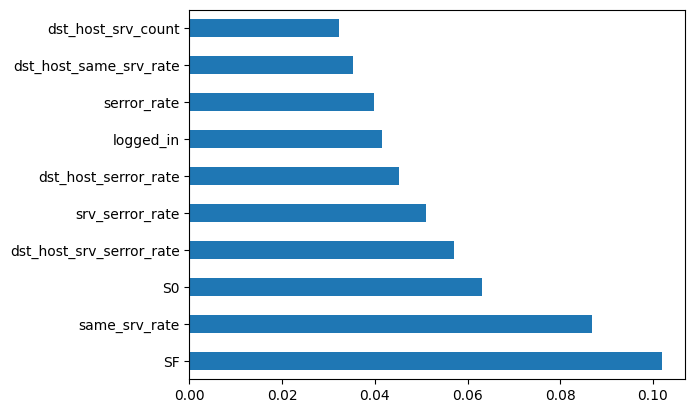

In [64]:
#tracer un graphique des importances des caractéristiques pour une meilleure visualisation
feat_importances = pd.Series(model.feature_importances_, index=X_train_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


#####XGBoost (eXtreme Gradient Boosting) est un algorithme d'apprentissage automatique basé sur des arbres de décision qui utilise un processus d'ajustement en cascade pour améliorer la précision des prévisions.

In [65]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X_train_bin,y_train_bin)
print(model.feature_importances_)

[3.05124046e-03 1.68312758e-01 1.15799094e-02 0.00000000e+00
 3.82471643e-02 0.00000000e+00 3.99354324e-02 2.63636466e-04
 2.38584056e-02 8.86672991e-04 1.67194556e-03 1.02610065e-04
 4.31041350e-04 1.63767207e-03 3.55446537e-04 7.64517987e-04
 0.00000000e+00 0.00000000e+00 1.32131344e-03 1.49930716e-02
 5.88708650e-03 2.45177746e-03 2.79614382e-04 6.30968600e-04
 3.15816811e-04 6.03058259e-04 1.63212675e-03 8.83598696e-04
 1.35863840e-03 5.06902114e-03 2.00498123e-02 2.19275686e-03
 1.14234313e-02 4.16196277e-03 3.28609720e-03 2.59953691e-03
 2.78396951e-03 8.30115052e-04 2.97351903e-03 3.80492816e-03
 9.98561387e-04 5.52623475e-04 1.45553309e-03 0.00000000e+00
 0.00000000e+00 2.95674778e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.00555427e-03 0.00000000e+00 1.76462077e-03
 3.56550127e-01 0.00000000e+00 0.00000000e+00 1.70824665e-03
 1.19522761e-03 1.28824553e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.036521

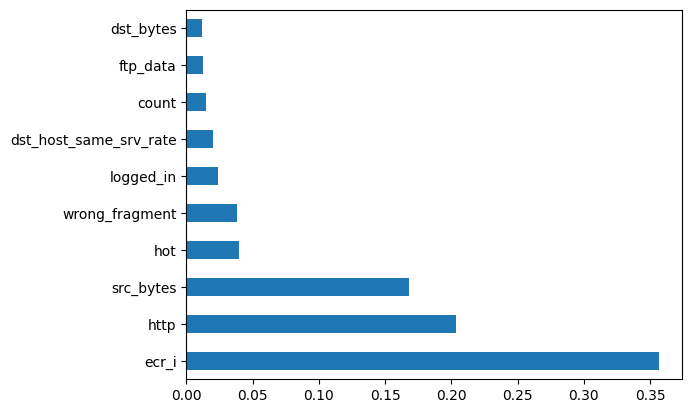

<Figure size 800x600 with 0 Axes>

In [66]:
# tracer le graphique des importances des fonctionnalités pour une meilleure visualisation
#feature selection of numeric dataser

feat_imp = pd.Series(model.feature_importances_, index=X_train_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [67]:
model = xgboost.XGBClassifier()
model.fit(X_train_num_bin,y_train_num_bin)
print(model.feature_importances_)

[0.00917507 0.31338978 0.03978161 0.         0.0385685  0.
 0.09060263 0.00775674 0.02179195 0.00114362 0.00522204 0.00249759
 0.01296056 0.00184366 0.00524415 0.0010809  0.         0.
 0.00168395 0.15483612 0.07774959 0.00493499 0.00168076 0.00154237
 0.00205417 0.00508616 0.00548086 0.00472802 0.00503561 0.04816069
 0.01828195 0.00531579 0.04240082 0.00902214 0.00676993 0.00735865
 0.00709849 0.03972018]


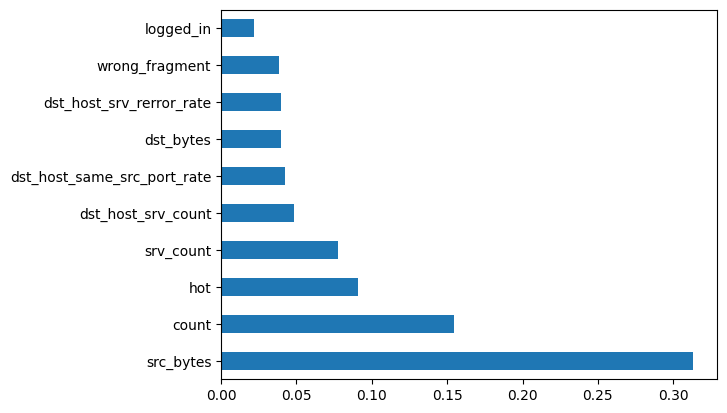

<Figure size 800x600 with 0 Axes>

In [68]:
# tracer le graphique des importances des fonctionnalités pour une meilleure visualisation
#feature selection of hole dataset

feat_imp = pd.Series(model.feature_importances_, index=X_train_num_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

#Data Standardization

La standardisation des données est une étape de prétraitement importante en apprentissage automatique. Elle consiste à transformer les données d'entrée de telle sorte que les valeurs soient centrées autour de zéro avec une variance unitaire.


* **Formula = z = x -mean / standard deviation**
* **Scaling vs. Normalization**:quelle est la différence ? La différence est que, dans la mise à l'échelle, vous modifiez la plage de vos données.Lorsque vous normalisez une distribution normale, la moyenne devient 0 et l'écart type devient 1.Cela vous permet de calculer facilement la probabilité que certaines valeurs se produisent dans votre distribution, ou de comparer des ensembles de données avec différentes moyennes et écarts-types... tandis qu'en normalisation, vous modifiez la forme de la distribution de vos données.

* **La standardisation est utile** lorsque vos données ont des échelles variables et que l'algorithme que vous utilisez fait des hypothèses sur la distribution gaussienne de vos données, telles que la régression linéaire, la régression logistique et l'analyse discriminante linéaire.
* **La normalisation est utile** lorsque vos données ont des échelles variables et que l'algorithme que vous utilisez ne fait pas d'hypothèses sur la distribution de vos données, telles que les k plus proches voisins et les réseaux de neurones artificiels. La normalisation suppose que vos données ont une distribution gaussienne (courbe en cloche)

* X pour la donnée
* y_bin pour la classification binaire de **label**
* y_multi pour multi-class classification de  **label**

In [69]:
# sélection de colonnes d'attributs numériques à partir de données
numeric_col = train_data.select_dtypes(include='number').columns

In [70]:
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [71]:
# Utilisation de StandardScaler pour la normalisation
std_scaler = StandardScaler()

def standardization(df, col):
    for i in col:
        arr = df[i].values
        arr = tf.reshape(arr, (len(arr), 1))
        df[i] = tf.squeeze(std_scaler.fit_transform(arr))
    return df

In [72]:
# données avant la normalisation
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [73]:
# appeler la fonction normalization()
data = standardization(train_data.copy(),numeric_col)

In [74]:
# data apres normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [75]:
# sélection d'attributs de données catégorielles
cat_col = ['protocol_type','service','flag']

In [76]:
# création d'un dataframe avec uniquement des attributs catégoriels
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [77]:
# one-hot-encoding des attributss categoricielles en utilisant  pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

In [79]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']

In [80]:
y_multi = multi_data['label']

In [81]:
from sklearn.preprocessing import LabelBinarizer

y_multi = LabelBinarizer().fit_transform(y_multi)

In [82]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

# Modelisation
La modélisation est l'étape de création d'un modèle à partir des données d'entraînement afin de prédire des résultats pour de nouvelles données. Cette étape implique le choix d'un algorithme approprié, la configuration des paramètres, la formation du modèle et son évaluation.


##Classification Binaire

In [83]:
# diviser l'ensemble de données à 75 % pour la formation et à 25 % pour les tests
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)


###K-nearest-neighbor Classifier (Binary Classification)
Le KNN (K-Nearest Neighbors) Classifier est un algorithme d'apprentissage supervisé utilisé pour la classification. Il est basé sur le principe selon lequel les instances similaires sont regroupées dans des classes similaires.



In [84]:
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

knn = KNeighborsClassifier(n_neighbors=5)  # Création du modèle avec 5 voisins
knn.fit(tf.constant(X_train), tf.constant(y_train))  # Entraînement du modèle sur l'ensemble d'entraînement


KNeighborsClassifier()

In [85]:
# Prédiction de la variable cible sur l'ensemble de test
y_pred = knn.predict(tf.constant(X_test))

# Calcul de l'exactitude de la prédiction
ac = accuracy_score(tf.constant(y_test), y_pred) * 100

# Affichage de l'exactitude
print("La précision de l'ensemble binaire du classificateur KNN est", ac)


La précision de l'ensemble binaire du classificateur KNN est 99.60309900298469


In [86]:
# rapport de classification
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

     anormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [87]:
# Importer les modules nécessaires
import tensorflow as tf
from sklearn import metrics

# ...

# Calculer les prédictions
y_pred = knn.predict(X_test)

# Calculer les métriques d'évaluation
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = metrics.explained_variance_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

# Afficher les métriques
print("Mean Absolute Error - ", mae) #erreur absolue moyenne
print("Mean Squared Error - ", mse) #l'erreur quadratique moyenne
print("Root Mean Squared Error - ", rmse) # la racine carrée de l'erreur quadratique moyenne
print("R2 Score - ", r2_score)  #le score R2
print("Accuracy - ", accuracy) #l'exactitude


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Mean Absolute Error -  0.003969009970153045
Mean Squared Error -  0.003969009970153045
Root Mean Squared Error -  0.06300007912814908
R2 Score -  98.40564711626689
Accuracy -  99.60309900298469


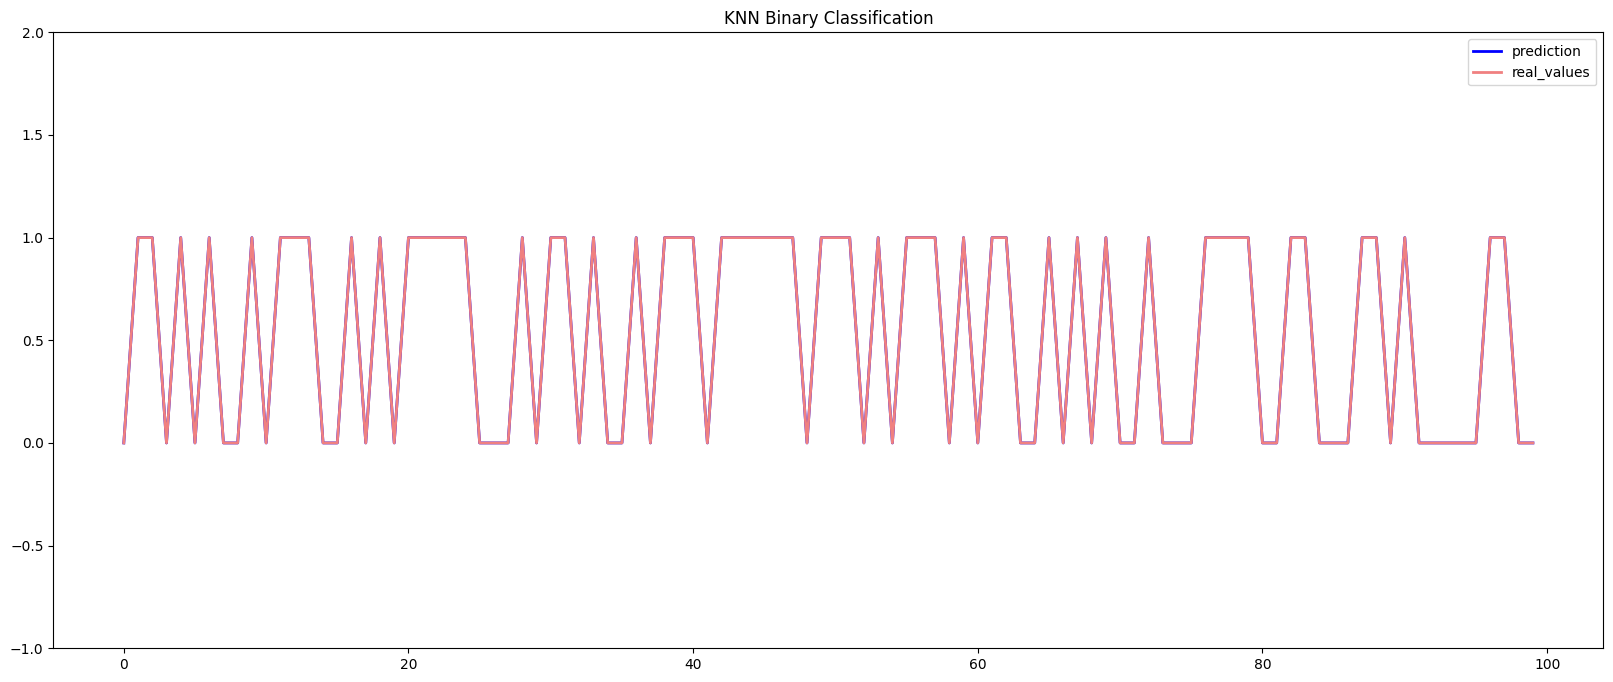

In [88]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()

### Classification Long Short-Term Memory  (Binary Classification)

Un Long Short-Term Memory (LSTM) Classifier est un type de modèle récurrent utilisé pour effectuer des classifications, notamment la classification binaire. Les LSTM sont des réseaux de neurones récurrents spécialement conçus pour traiter des séquences de données, comme des séries temporelles.

In [89]:
X_train = X_train.values

In [90]:
y_train = np.array(y_train)

In [91]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [92]:
x_train.shape

(94479, 1, 122)

In [93]:
x_train

array([[[ 0.        ,  1.        ,  0.        , ...,  1.6189552 ,
         -0.38763462, -0.37638703]],

       [[ 0.        ,  1.        ,  0.        , ...,  1.6189552 ,
         -0.38763462, -0.37638703]],

       [[ 0.        ,  1.        ,  0.        , ...,  1.6189552 ,
         -0.38763462, -0.37638703]],

       ...,

       [[ 0.        ,  1.        ,  0.        , ..., -0.6248708 ,
          2.87440955,  2.75391372]],

       [[ 0.        ,  1.        ,  0.        , ..., -0.6248708 ,
         -0.38763462, -0.37638703]],

       [[ 0.        ,  0.        ,  1.        , ..., -0.6248708 ,
         -0.38763462, -0.37638703]]])

In [94]:
lst = Sequential()
# couche d'entrée et couche LSTM avec 50 neurones
lst.add(LSTM(50,input_dim=122))

# couche de sortie avec activation sigmoïd
lst.add(Dense(1,activation='sigmoid'))

In [95]:
#définir la fonction de perte, l'optimiseur, les métriques, puis compiler le modèle
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                34600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Entrainner le modèle sur le jeu de données d'entrainement
history = lst.fit(x_train, y_train, epochs=20, batch_size=5000,validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 4s 82ms/step - loss: 0.6176 - accuracy: 0.8505 - val_loss: 0.5271 - val_accuracy: 0.9241
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4649 - accuracy: 0.9230 - val_loss: 0.3950 - val_accuracy: 0.9231
Epoch 3/20
16/16 [==============================] - 1s 66ms/step - loss: 0.3478 - accuracy: 0.9281 - val_loss: 0.2973 - val_accuracy: 0.9361
Epoch 4/20
16/16 [==============================] - 1s 63ms/step - loss: 0.2640 - accuracy: 0.9466 - val_loss: 0.2306 - val_accuracy: 0.9529
Epoch 5/20
16/16 [==============================] - 1s 68ms/step - loss: 0.2080 - accuracy: 0.9573 - val_loss: 0.1869 - val_accuracy: 0.9605
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.1712 - accuracy: 0.9631 - val_loss: 0.1580 - val_accuracy: 0.9655
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.1466 - accuracy: 0.9670 - val_loss: 0.1384 - val_accuracy: 0.9677
Epoch 8/20
16

In [98]:
X_test = X_test.to_numpy()

In [99]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [100]:
# Ce code définit la fonction de perte, l'optimiseur et les métriques pour le modèle LSTM et compile le modèle
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [101]:
#prédiction de la variable cible sur l'ensemble de données de test et afficher les résultats du test, y compris la perte (loss) et l'exactitude (accuracy) du modèle :
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9750
Test results - Loss: 0.06732864677906036 - Accuracy: 97.50428795814514%


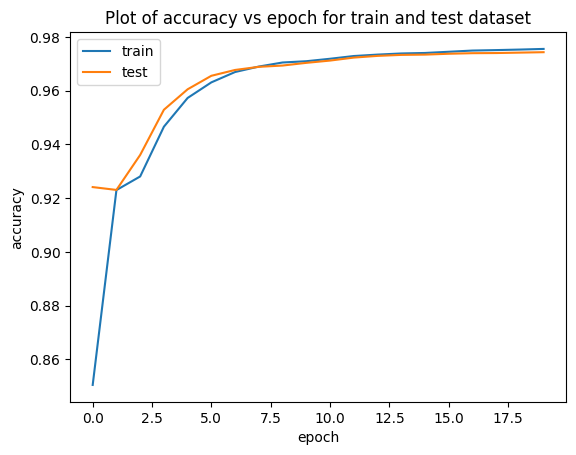

In [102]:
# tracer un graphique de l'exactitude (accuracy) du modèle en fonction des epochs pour les ensembles de données d'entraînement et de test :
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

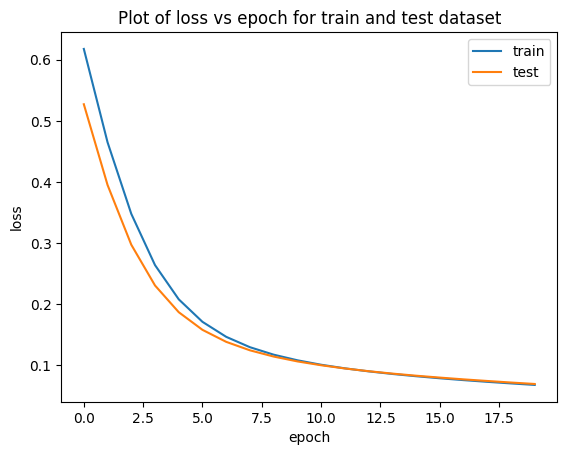

In [103]:
# Tracé de la perte par rapport à l'époque de l'ensemble de données d'entrainnement et  de test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [104]:
y_test.shape

(31494,)

In [105]:
y_pred = lst.predict(x_test)

985/985 [==============================] - 2s 2ms/step


In [106]:
y_pred.shape

(31494, 1)

In [107]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

985/985 [==============================] - 2s 2ms/step


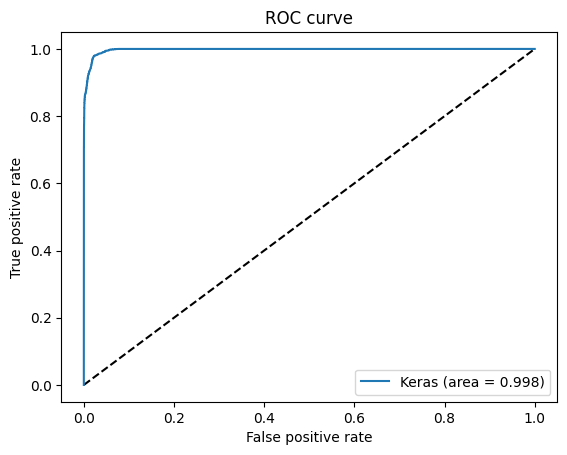

In [108]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [109]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

985/985 [==============================] - 2s 2ms/step


In [110]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9894479551687135
F1 Score -  0.9768687463213657
Precision Score -  0.9646053702196908


##Multi-class Classification

###K-nearest-neighbor Classifier (Multi-class Classification)

In [111]:
# diviser l'ensemble de données à 75 % pour la formation et à 25 % pour les tests
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [112]:

# Création du modèle KNN avec 5 voisins
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle sur l'ensemble d'entraînement
knn.fit(tf.constant(X_train), tf.constant(y_train))


KNeighborsClassifier()

In [113]:
y_pred=knn.predict(X_test)  # prédire l'attribut target sur l'ensemble de données de test
ac=accuracy_score(y_test, y_pred)*100  # calcul de la précision des données prédites
print("La précision de l'ensemble multi-classes KNN-Classifier est ", ac)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


La précision de l'ensemble multi-classes KNN-Classifier est  99.57134692322347


In [114]:
# rapport de classification
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.99      0.99      0.99      2947
         R2L       0.94      0.93      0.93       274
         U2R       0.50      0.27      0.35        15
      normal       1.00      1.00      1.00     16774

   micro avg       1.00      1.00      1.00     31494
   macro avg       0.88      0.84      0.85     31494
weighted avg       1.00      1.00      1.00     31494
 samples avg       1.00      1.00      1.00     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
print("Erreur absolue moyenne- " , metrics.mean_absolute_error(y_test, y_pred))
print("Erreur quadratique moyenne - " , metrics.mean_squared_error(y_test, y_pred))
print("Calcul de l'erreur quadratique moyenne racine - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)


Erreur absolue moyenne-  0.0016638089794881565
Erreur quadratique moyenne -  0.0016638089794881565
Calcul de l'erreur quadratique moyenne racine -  0.04078981465376077
R2 Score -  76.46474939829632
Accuracy -  99.57134692322347


###Multi Layer Perceptron Classifier (Multi-class Classification)

In [116]:
# diviser l'ensemble de données à 75 % pour la formation et à 25 % pour les tests
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [117]:
import tensorflow as tf

mlp = tf.keras.models.Sequential()  # Initializing the model

#Ajout de la couche d'entrée et de la première couche avec 50 neurones
mlp.add(tf.keras.layers.Dense(units=50, input_shape=(X_train.shape[1],), activation='relu'))

# Ajout de la couche de sortie avec activation softmax
mlp.add(tf.keras.layers.Dense(units=5, activation='softmax'))


In [118]:
#définir la fonction de perte, l'optimiseur, les métriques, puis compiler le modèle
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
#résumé des couches de modèle
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                6150      
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [120]:
# entraîner le modèle sur l'ensemble de données d'entraînement
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 31ms/step - loss: 1.3418 - accuracy: 0.6267 - val_loss: 0.9713 - val_accuracy: 0.8711
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.7498 - accuracy: 0.9012 - val_loss: 0.5462 - val_accuracy: 0.9217
Epoch 3/100
16/16 [==============================] - 0s 19ms/step - loss: 0.4389 - accuracy: 0.9320 - val_loss: 0.3490 - val_accuracy: 0.9375
Epoch 4/100
16/16 [==============================] - 0s 18ms/step - loss: 0.2962 - accuracy: 0.9440 - val_loss: 0.2562 - val_accuracy: 0.9480
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 0.2271 - accuracy: 0.9536 - val_loss: 0.2073 - val_accuracy: 0.9566
Epoch 6/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1885 - accuracy: 0.9594 - val_loss: 0.1779 - val_accuracy: 0.9618
Epoch 7/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1641 - accuracy: 0.9639 - val_loss: 0.1579 - val_accuracy: 0.9655
Epoch 

In [121]:
#définir la fonction de perte, l'optimiseur, les métriques, puis compiler le modèle
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
# prédire l'attribut target sur l'ensemble de données de test
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 2ms/step - loss: 0.0273 - accuracy: 0.9926
Test results - Loss: 0.02731764130294323 - Accuracy: 99.25700426101685%


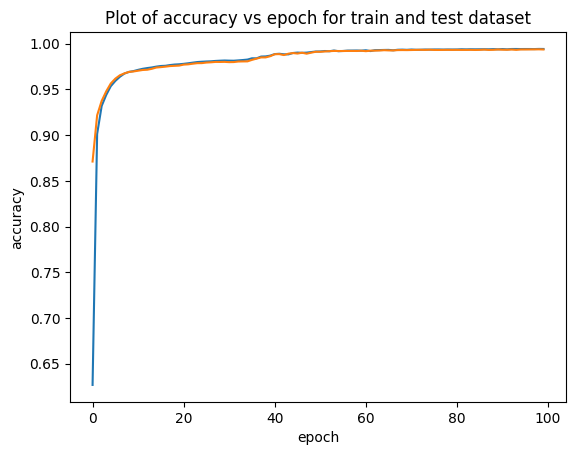

In [123]:
# graphe de précision par rapport à l'époque pour l'ensemble de données d'entraînement et de test
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

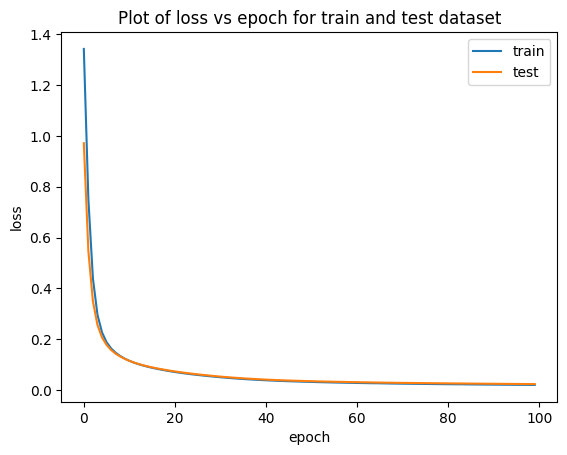

In [124]:
# graphique de la perte par rapport à l'époque pour l'ensemble de données d'entraînement et de test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()